In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_csv("LoanApprovalPrediction.csv")

In [6]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [12]:
# object datatypes
object=(data.dtypes=='object')
print("catagorical varriables = ",len(object[object].index))

catagorical varriables =  7


In [14]:
# loan id is not correlated with loan so delete it
data.drop(['Loan_ID'],axis=1,inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    object 
 1   Married            598 non-null    object 
 2   Dependents         586 non-null    float64
 3   Education          598 non-null    object 
 4   Self_Employed      598 non-null    object 
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   584 non-null    float64
 9   Credit_History     549 non-null    float64
 10  Property_Area      598 non-null    object 
 11  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 56.2+ KB


In [16]:
data.isnull().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
data.shape

(598, 12)

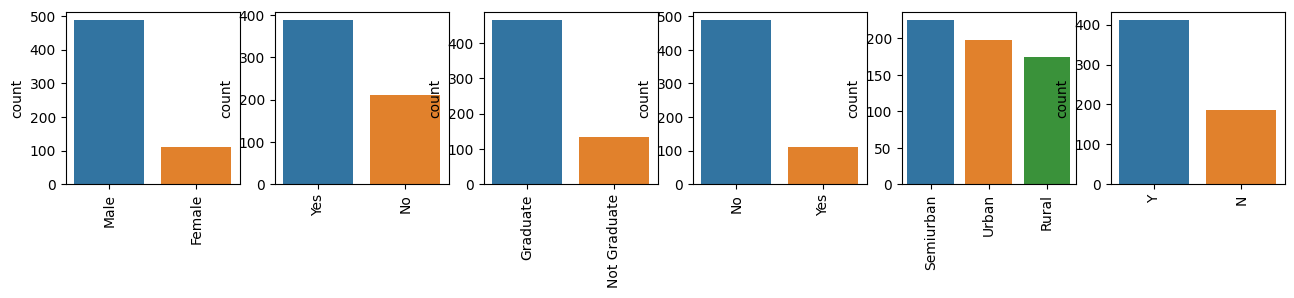

In [39]:
plt.figure(figsize=(40,80))
index=1
object=(data.dtypes=='object')
object_columns=list(object[object].index)

for columns in object_columns:
    y=data[columns].value_counts()
    plt.subplot(30,15,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index),y=y)
    index+=1

In [40]:
# Import label encoder 
from sklearn import preprocessing 
    
# label_encoder object knows how  
# to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
object = (data.dtypes == 'object') 
for col in list(object[object].index): 
  data[col] = label_encoder.fit_transform(data[col])

In [41]:
# To find the number of columns with  
# datatype==object 
obj = (data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


<Axes: >

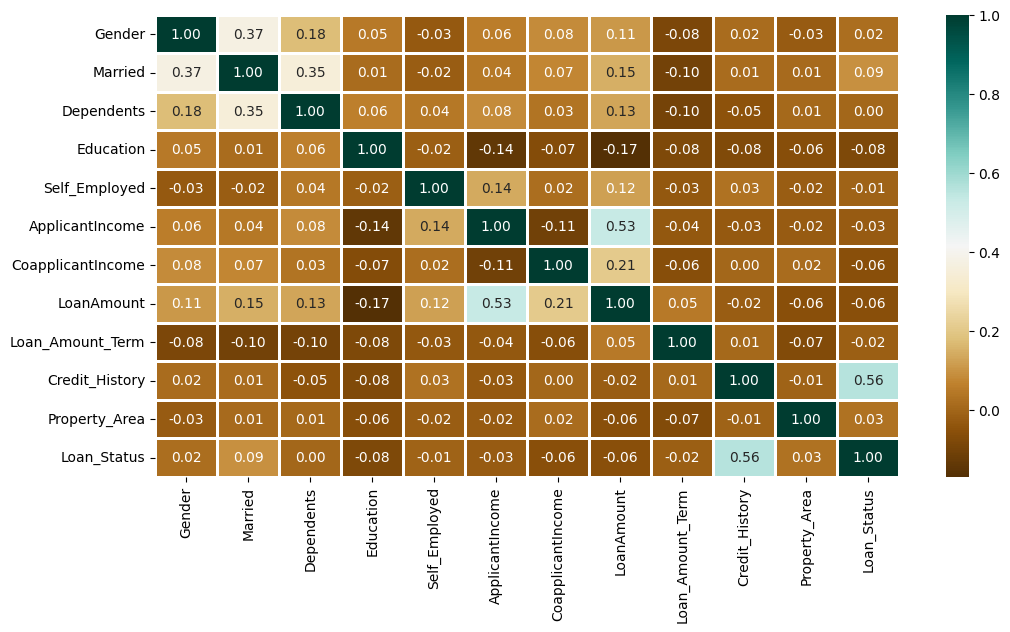

In [42]:
plt.figure(figsize=(12,6)) 
  
sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f', 
            linewidths=2,annot=True)

<Axes: >

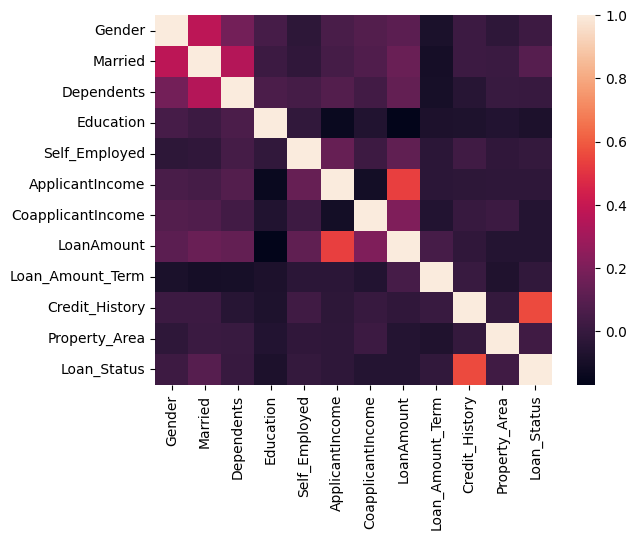

In [45]:
sns.heatmap(data.corr())

In [46]:
# Credit_History has a high impact on Loan_Status.

<Axes: xlabel='Gender', ylabel='Married'>

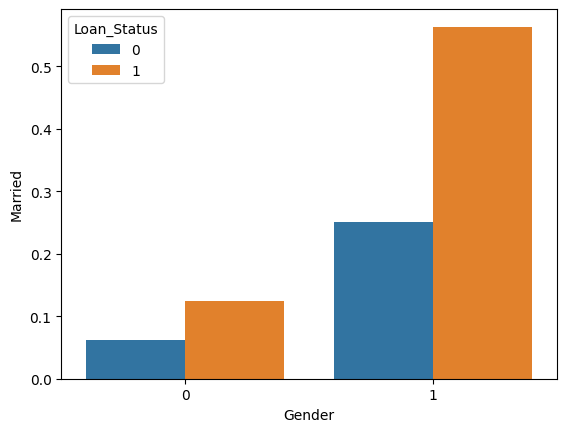

In [47]:
sns.barplot(x="Gender", y="Married", hue="Loan_Status", data=data, estimator=lambda x: len(x) / len(data))


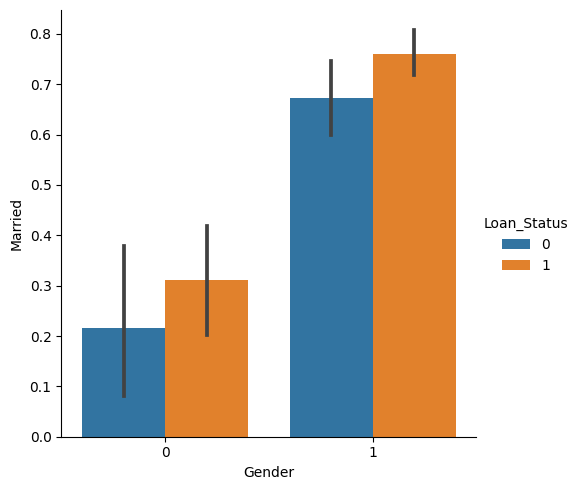

In [48]:
sns.catplot(x="Gender", y="Married", 
            hue="Loan_Status",  
            kind="bar",  
            data=data)

<Axes: xlabel='Married', ylabel='Gender'>

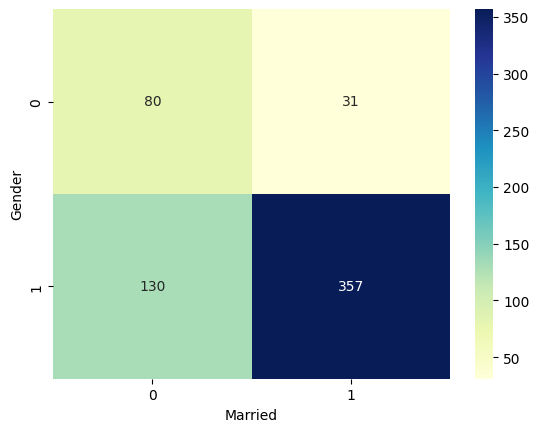

In [49]:
pivot_table = data.pivot_table(index='Gender', columns='Married', values='Loan_Status', aggfunc='count')
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='g')


<Axes: xlabel='Gender', ylabel='Married'>

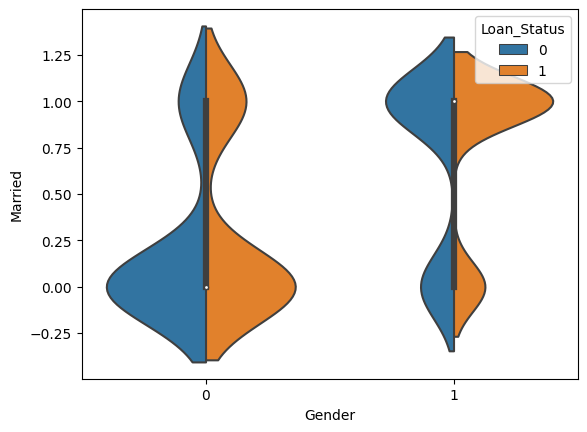

In [50]:
sns.violinplot(x="Gender", y="Married", hue="Loan_Status", data=data, split=True)


<Axes: xlabel='Gender', ylabel='Married'>

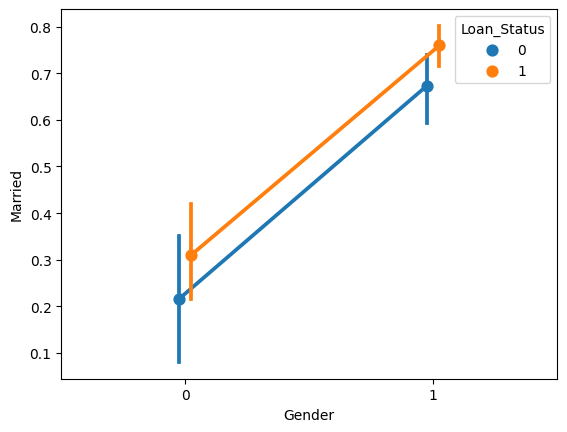

In [51]:
sns.pointplot(x="Gender", y="Married", hue="Loan_Status", data=data, dodge=True)


In [53]:
#for missign values
for col in data.columns: 
  data[col] = data[col].fillna(data[col].mean())  
    
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [54]:
from sklearn.model_selection import train_test_split 
  
X = data.drop(['Loan_Status'],axis=1) 
Y = data['Loan_Status'] 
X.shape,Y.shape 
  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.4,random_state=1) 
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((358, 11), (240, 11), (358,), (240,))

In [56]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 
  
from sklearn import metrics 


knn = KNeighborsClassifier(n_neighbors=3) 
rfc = RandomForestClassifier(n_estimators = 7, 
                             criterion = 'entropy', 
                             random_state =7) 
svc = SVC() 
lc = LogisticRegression() 
  
# making predictions on the training set 
for clf in (rfc, knn, svc,lc,scaler): 
    clf.fit(X_train, Y_train) 
    Y_pred = clf.predict(X_train) 
    print("Accuracy score of ", 
          clf.__class__.__name__, 
          "=",100*metrics.accuracy_score(Y_train,  
                                         Y_pred))

Accuracy score of  RandomForestClassifier = 98.04469273743017
Accuracy score of  KNeighborsClassifier = 78.49162011173185
Accuracy score of  SVC = 68.71508379888269
Accuracy score of  LogisticRegression = 79.60893854748603


C:\Users\ARKA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AttributeError: 'StandardScaler' object has no attribute 'predict'

In [60]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
from sklearn.model_selection import train_test_split

# Assuming X_train and Y_train are already defined
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize classifiers
knn = KNeighborsClassifier(n_neighbors=3) 
rfc = RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7) 
svc = SVC() 
lc = LogisticRegression(max_iter=1000) 
scaler = StandardScaler()

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)

# Train and evaluate models
for clf in (rfc, knn, svc, lc):
    if clf == scaler:
        # Skip scaler in the loop
        continue
    
    # If the model requires scaled data, use X_train_scaled
    if clf == knn or clf == svc or clf == lc:
        clf.fit(X_train_scaled, Y_train)
    else:
        clf.fit(X_train, Y_train)
    
    Y_pred = clf.predict(X_train_scaled if clf != rfc else X_train)
    
    print("Accuracy score of", clf.__class__.__name__, "=", 100 * metrics.accuracy_score(Y_train, Y_pred))


Accuracy score of RandomForestClassifier = 96.23430962343096
Accuracy score of KNeighborsClassifier = 83.89121338912135
Accuracy score of SVC = 82.42677824267783
Accuracy score of LogisticRegression = 80.5439330543933


In [61]:
# Making predictions on the testing set
for clf in (rfc, knn, svc, lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy score of", clf.__class__.__name__, "=", 100 * metrics.accuracy_score(Y_test, Y_pred))


Accuracy score of RandomForestClassifier = 78.33333333333333
Accuracy score of KNeighborsClassifier = 66.66666666666666
Accuracy score of SVC = 70.83333333333334
Accuracy score of LogisticRegression = 82.5


# LogisticRegression is giving the best accuracy with an accuracy score of 82% for the testing dataset.